# HW5

For this homework, we are going to work with [*Indoor User Movement Prediction from RSS data*](https://archive.ics.uci.edu/ml/datasets/Indoor+User+Movement+Prediction+from+RSS+data) dataset from UCI.  The homework is due Friday, December 21st midnight. 

## Task 1

Download the dataset and unzip it in under a subdirectory of `data` folder named `rss_data`.

The files we are interested is in the subfolder `dataset`.  Each of these files whose names that start with `MovementAAL_RSS_` contain data collected from indivuduals. Each of these files represent a single data point.  There are 314 of these files, and hence, you have 314 data points.  Each file has 4 columns but the number of rows change from file to file.  

There is also a file named `MovementALL_target.csv` in that folder. This file tells us the class each of these measurements are assigned. Some of these measurements are labelled with +1 and some are labelled with -1.

## Task 2

Construct a SVM model that separates +1 labelled data points from -1 data points.  You must first solve the problem that these datapoints do not have the same number of rows even though they all have the same number of columns. 

## Task 3

Using [Keras](https://keras.io/getting-started/sequential-model-guide/) write a neural network model that separates +1 labelled data points from -1 data points.

## Notes

1. You must document each step of your tasks: what are you doing, why are you doing it, what problems you encountered and how you solved it.  All of these must be explained and documented.  Solutions without sufficient documentations will be penalized accordingly. 50% of your points will come from your code, while the other 50% will come from your explanations.

1. You can use MS Excel to inspect the files, but loading them up to python using pandas and inspecting them there under jupyter is easier.

3. Put the data in a separate subfolder of your `data` folder and rename it `rss_data`. I'll take points off if the data is not saved under the correct place.

1. For both of Task 2 and Task 3, you must split your data into a train and test set, and then evaluate the accuracy of your model on the test set.



In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import neighbors
from sklearn import linear_model
from sklearn.svm import SVC

import matplotlib.pyplot as plt

First we open the Target file which includes the +1 / -1 points which is our binary data.

In [2]:
df_target = pd.read_csv(r'C:\Users\Damla\Desktop\data\rss_data\MovementAAL_target.csv', 
                             names=('sequence_ID', 'class_label'), 
                             skiprows=(1))

our first function does the selection of all MovementAAL_RSS_i files, the amount is 314.
then we defined data which checks as the number of sequence_ID which is 314 and counted all the elements.

In [4]:
def get_dataframe(seq_id):
    return pd.read_csv(r'C:\Users\Damla\Desktop\data\rss_data\MovementAAL_RSS_%s.csv' % seq_id, 
                           names=('RSS_anchor1', 'RSS_anchor2','RSS_anchor3', 'RSS_anchor4'), 
                           skiprows=(1))


def steps(df):
    value = 0
    for idx, row in df.iterrows():
        data = get_dataframe(row['sequence_ID'])
        value += len(data.get_values())
        
    return value

print('Total steps: %d' % steps(df_target))

Total steps: 13197


len(data) gives us the count os rows in the whole data includes all csv files.
concat() function: Concatenate pandas objects along a particular axis with optional set logic along the other axes.
now we have all of the signals/ data points and their targets.

The problem was the length of vectors that each of them have different length. So I could not make the length equal but because of the time I had to install it, sorry for that.

In [5]:
def create_data(df):
    frames = []
    target = []
    for idx, row in df.iterrows():
        data = get_dataframe(row['sequence_ID'])
        frames.append(data)
        arr = [row['class_label']] * len(data)
        target += arr
        
    return pd.concat(frames), target


data_test, target_test = create_data(df_target)

from the data we got the all values, all elements and count them. 
And we choosed the %80 for train set and %20 in the tests.

Then we choosed the train/test value determined by our 'perc'

Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. And actually the kernel='rbf' as default (Radial Basis Function)

In [24]:
create_data(df_target)

(    RSS_anchor1  RSS_anchor2  RSS_anchor3  RSS_anchor4
 0     -0.904760     -0.48000     0.285710      0.30000
 1     -0.571430     -0.32000     0.142860      0.30000
 2     -0.380950     -0.28000    -0.142860      0.35000
 3     -0.285710     -0.20000    -0.476190      0.35000
 4     -0.142860     -0.20000     0.142860     -0.20000
 5     -0.142860     -0.20000     0.047619      0.00000
 6     -0.142860     -0.16000    -0.380950      0.20000
 7     -0.142860     -0.04000    -0.619050     -0.20000
 8     -0.095238     -0.08000     0.142860     -0.55000
 9     -0.047619      0.04000    -0.095238      0.05000
 10    -0.190480     -0.04000     0.095238      0.40000
 11    -0.095238     -0.04000    -0.142860      0.35000
 12    -0.333330     -0.08000    -0.285710     -0.20000
 13    -0.238100      0.04000     0.142860      0.35000
 14     0.000000      0.08000     0.142860      0.05000
 15    -0.095238      0.04000     0.095238      0.10000
 16    -0.142860     -0.20000     0.142860      

In [12]:
X = data_test.get_values()
y = target_test

n_samples = len(X)

perc = int(.8* n_samples)
X_train = X[:perc]
y_train = y[:perc]
X_test = X[perc:]
y_test = y[perc:]

clf = SVC()
clf.fit(X_train, y_train)

C:\Users\Damla\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Just to see the data plotting it.Each data item as a point in n-dimensional space with the value of each feature being the value of a particular coordinate.

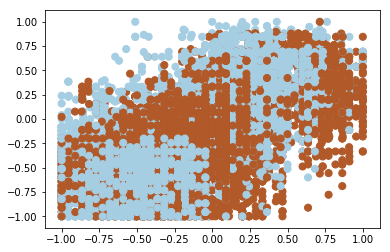

In [18]:
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

The accuracy is %70 which is not that good and as we can see from classification_matrix 471 + 248 fail.

In [19]:
# Score
clf.score(X_train, y_train)

0.702665150941013

In [20]:
# Predict Output
clf.predict(X_test)


array([ 1,  1,  1, ...,  1, -1, -1], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
classifier = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.25)
classifier.fit(X_train,y_train)

predicted_ys = classifier.predict(X_test)
confusion_matrix(y_test,predicted_ys)

array([[416, 471],
       [248, 845]], dtype=int64)